### Loading our vectore database

In [2]:
import json
from vector_db_manager import VectoreDatabaseManager

vdb_manager = VectoreDatabaseManager()
vector_db = vdb_manager.get_vector_databaase()

Loading exisiting vector database ...


In [3]:
all_documents = vector_db.docstore._dict.values()

In [4]:
all_chunks = []
for i, doc in enumerate(all_documents):
    all_chunks.append({
        "chunk_id": doc.metadata['chunk_id'],
        "source_file_path": doc.metadata['file_path'],
        "chunk_content": doc.page_content
    })

In [5]:
import pandas as pd

df = pd.DataFrame(all_chunks)
df.head()

,chunk_id,source_file_path,chunk_content
0,مركز_وقاء_chunk_0,data/knowledge_base/مركز_وقاء.txt,مركز وقاء هو المركز الوطني المتخصص في الوقاية ...
1,مركز_وقاء_chunk_1,data/knowledge_base/مركز_وقاء.txt,رادار وقاء هو نظام يراقب البؤر الحيوانية لحظيا...
2,مركز_وقاء_chunk_2,data/knowledge_base/مركز_وقاء.txt,نظام مهامي هو أداة لإدارة وتتبع المهام داخل ال...
3,مركز_وقاء_chunk_3,data/knowledge_base/مركز_وقاء.txt,نظام إدارة الاستراتيجية وقياس الأداء يهدف إلى ...
4,مركز_وقاء_chunk_4,data/knowledge_base/مركز_وقاء.txt,نظام إدارة الاستبانات يسهل جمع آراء الموظفين و...


In [6]:
topics = df.source_file_path.unique()
topics

array(['data/knowledge_base/مركز_وقاء.txt',
       'data/knowledge_base/الأسئلة والأجوبة.txt',
       'data/knowledge_base/future_plateform.txt',
       'data/knowledge_base/بيانات المؤتمر.txt',
       'data/knowledge_base/original_fiels/Mohamed Hassan.pdf'],
      dtype=object)

### Now, we could make our Evaluation data for our RAG System

In [7]:
def get_me_chunk_of_topic(file_path):
    """
    Function that help us print all chunks of each topic so that we could make some questions and hummanly (or with LLMs) select relevant questions
    """
    focused_df = df.query(f"source_file_path == '{file_path}'")
    for i in range(focused_df.shape[0]):
        print(f'============= {focused_df.iloc[i, 0]} =============')
        print(focused_df.iloc[i, 2])
        print()

#### 1) data/knowledge_base/الاسئلة والأجوبة.txt

In [8]:
get_me_chunk_of_topic('data/knowledge_base/الاسئلة والأجوبة.txt')

In [9]:
organic_farming_eval_set = [
    {
        "question": "ما هي الزراعة العضوية؟",
        "relevant_chunks": ["الأسئلة والأجوبة_chunk_0"]
    },
    {
        "question": "ما هي مبادئ الزراعة العضوية؟",
        "relevant_chunks": ["الأسئلة والأجوبة_chunk_1", "الأسئلة والأجوبة_chunk_2", "الأسئلة والأجوبة_chunk_3"]
    },
    {
        "question": "ما هي فوائد الزراعة العضوية؟",
        "relevant_chunks": ["الأسئلة والأجوبة_chunk_4", "الأسئلة والأجوبة_chunk_5", "الأسئلة والأجوبة_chunk_6"]
    },
    {
        "question": "كيف أتعرف على المنتجات العضوية؟",
        "relevant_chunks": ["الأسئلة والأجوبة_chunk_8"]
    },
    {
        "question": "هل يوجد دعم حكومي للإنتاج العضوي في المملكة؟",
        "relevant_chunks": ["الأسئلة والأجوبة_chunk_13"]
    }
]

organic_farming_eval_set_df = pd.DataFrame(organic_farming_eval_set)
organic_farming_eval_set_df['file_path'] = 'data/knowledge_base/الاسئلة والأجوبة.txt'

#### 2) data/knowledge_base/مركز_وقاء.txt

In [10]:
get_me_chunk_of_topic('data/knowledge_base/مركز_وقاء.txt')

============= مركز_وقاء_chunk_0 =============
مركز وقاء هو المركز الوطني المتخصص في الوقاية من الآفات النباتية والأمراض الحيوانية في المملكة العربية السعودية، حيث يعمل على تنفيذ سياسات وزارة البيئة والمياه والزراعة لضمان صحة واستدامة النباتات والحيوانات. يهدف إلى تعزيز مشاركة القطاع الخاص وتوحيد الجهود بين الجهات الحكومية والخاصة في هذا المجال.

============= مركز_وقاء_chunk_1 =============
رادار وقاء هو نظام يراقب البؤر الحيوانية لحظياً عبر خرائط رقمية، حيث يحدد مستوى الخطورة لكل بؤرة، ويمكن من خلاله الوصول إلى بيانات المربين والمسالخ والمشاريع الزراعية القريبة من المناطق المصابة، مما يساهم في حماية الثروة الحيوانية عبر الاستجابة السريعة للطوارئ وتحليل المخاطر المحيطة.

============= مركز_وقاء_chunk_2 =============
نظام مهامي هو أداة لإدارة وتتبع المهام داخل المركز، حيث يساعد في تنظيم العمل، تحديد الأولويات، تعزيز التعاون بين الفرق، وتقدير الوقت والموارد المطلوبة، مع إمكانية متابعة التقدم في إنجاز المهام واستخراج التقارير اللازمة لضمان الالتزام بالجداول الزمنية.

============= مركز_وق

In [11]:
weqaa_center_eval_set = [
    {
        "question": "ما هو مركز وقاء وما أهدافه؟",
        "relevant_chunks": ["مركز_وقاء_chunk_0"]
    },
    {
        "question": "ما هو نظام رادار وقاء وما أهميته؟",
        "relevant_chunks": ["مركز_وقاء_chunk_1"]
    },
    {
        "question": "ما هي الخدمات التي توفرها منصة خدمات مستفيدين الأعمال؟",
        "relevant_chunks": ["مركز_وقاء_chunk_6"]
    },
    {
        "question": "ما هو نظام إدارة الاستراتيجية وقياس الأداء؟",
        "relevant_chunks": ["مركز_وقاء_chunk_3"]
    },
    {
        "question": "ما هو برنامج “رفاه” وما أهدافه؟",
        "relevant_chunks": ["مركز_وقاء_chunk_7"]
    }
]

weqaa_center_eval_set_df = pd.DataFrame(weqaa_center_eval_set)
weqaa_center_eval_set_df['file_path'] = 'data/knowledge_base/مركز_وقاء.txt'

#### 3) data/knowledge_base/future_plateform.txt

In [12]:
get_me_chunk_of_topic('data/knowledge_base/future_plateform.txt')

============= future_plateform_chunk_0 =============
What is Future Platform?

Future Platform is an AI company that was founded in Saudi Arabia in 2018 as a response to the country's overwhelming demand for the new immersive technology. We specialize in cutting-edge AI solutions, innovative virtual reality applications, and comprehensive event services tailored for a multitude of industries.

============= future_plateform_chunk_1 =============
ما هي منصة المستقبل (Future Platform)؟
منصة المستقبل (Future Platform) هي شركة ذكاء اصطناعي تأسست في المملكة العربية السعودية عام 2018 استجابةً للطلب الكبير في البلاد على التكنولوجيا الغامرة الجديدة. نحن متخصصون في حلول الذكاء الاصطناعي المتقدمة، وتطبيقات الواقع الافتراضي المبتكرة، وخدمات الفعاليات الشاملة المصممة لمجموعة متنوعة من الصناعات.

============= future_plateform_chunk_2 =============
ما هي رؤية منصة المستقبل (Future Platform Vision)؟
الوقوف في طليعة تمكين الشركات والأفراد من خلال تقنيات الذكاء الاصطناعي والتحول الرقمي، لتشكيل مستقبل 

In [13]:
future_platform_eval_set = [
    {
        "question": "What is Future Platform and when was it founded?",
        "relevant_chunks": ["future_plateform_chunk_0", "future_plateform_chunk_1"]
    },
    {
        "question": "What is the vision of Future Platform?",
        "relevant_chunks": ["future_plateform_chunk_2"]
    },
    {
        "question": "What is the mission of Future Platform?",
        "relevant_chunks": ["future_plateform_chunk_2"]
    },
    {
        "question": "What services does Future Platform provide?",
        "relevant_chunks": ["future_plateform_chunk_3"]
    },
    {
        "question": "How does Future Platform use immersive event services?",
        "relevant_chunks": ["future_plateform_chunk_2"]
    }
]

future_platform_eval_set_df = pd.DataFrame(future_platform_eval_set)
future_platform_eval_set_df['file_path'] = 'data/knowledge_base/future_plateform.txt'

#### 4) data/knowledge_base/original_fiels/Mohamed Hassan.pdf

In [14]:
get_me_chunk_of_topic('data/knowledge_base/original_fiels/Mohamed Hassan.pdf')

============= Mohamed Hassan_chunk_0 =============
Mohamed Hassan
Data Scientist — Data Engineer
 Riyadh | Ó 0574345011 | R mo7amed7assan1911@gmail.com
¯ linkedin.com/in/mo7amed1911 |  github.com/mo7amed7assan1911
Summary
One who likes to manipulate data, focused on creating innovative data solutions. Proficient in extracting insights from
complex datasets through machine learning, deep learning, and statistical analysis. Skilled in designing ETL pipelines,

============= Mohamed Hassan_chunk_1 =============
data modeling, cloud platforms, and Big Data technologies such as Apache Spark for developing robust data solutions
that drive impactful decisions. Currently expanding skills in Large Language Models (LLMs) through projects like
machine translation systems and chatbot development.
Education
Faculty of Engineering | Tanta University
Sep. 2018 – June. 2023
• Bachelor of Engineering specializing in Computer Engineering and Control Department.
• Grade: Very good with honors (82.8 %)


In [15]:
mohamed_hassan_cv_eval_set = [
    {
        "question": "Where is Mohamed Hassan currently working?",
        "relevant_chunks": ["Mohamed Hassan_chunk_2"]
    },
    {
        "question": "What companies Mohamed Hassna worked in?",
        "relevant_chunks": ["Mohamed Hassan_chunk_3", "Mohamed Hassan_chunk_4", "Mohamed Hassan_chunk_5"]
    },
    {
        "question": "What technical tools and frameworks does Mohamed Hassan use?",
        "relevant_chunks": ["Mohamed Hassan_chunk_12"]
    },
    {
        "question": "What machine learning and deep learning techniques does Mohamed know?",
        "relevant_chunks": ["Mohamed Hassan_chunk_13", "Mohamed Hassan_chunk_14"]
    },
    {
        "question": "What certifications and courses has Mohamed Hassan completed?",
        "relevant_chunks": ["Mohamed Hassan_chunk_6"]
    },
    {
        "question": "What was Mohamed Hassan’s graduation project about?",
        "relevant_chunks": ["Mohamed Hassan_chunk_7", "Mohamed Hassan_chunk_8"]
    },
    {
        "question": "What other data science projects has Mohamed worked on?",
        "relevant_chunks": ["Mohamed Hassan_chunk_9", "Mohamed Hassan_chunk_10", "Mohamed Hassan_chunk_11"]
    },
    {
        "question": "Has Mohamed Hassan received any awards or achievements?",
        "relevant_chunks": ["Mohamed Hassan_chunk_14"]
    }
]

mohamed_hassan_cv_eval_set_df = pd.DataFrame(mohamed_hassan_cv_eval_set)
mohamed_hassan_cv_eval_set_df['file_path'] = 'data/knowledge_base/original_fiels/Mohamed Hassan.pdf'

In [16]:
combined_eval_df = pd.concat([
    organic_farming_eval_set_df,
    weqaa_center_eval_set_df,
    future_platform_eval_set_df,
    mohamed_hassan_cv_eval_set_df
], ignore_index=True)


combined_eval_df.to_csv('RAG_Evaluation/evaluation_set.csv', index=False)
combined_eval_df.head()

,question,relevant_chunks,file_path
0,ما هي الزراعة العضوية؟,[الأسئلة والأجوبة_chunk_0],data/knowledge_base/الاسئلة والأجوبة.txt
1,ما هي مبادئ الزراعة العضوية؟,"[الأسئلة والأجوبة_chunk_1, الأسئلة والأجوبة_ch...",data/knowledge_base/الاسئلة والأجوبة.txt
2,ما هي فوائد الزراعة العضوية؟,"[الأسئلة والأجوبة_chunk_4, الأسئلة والأجوبة_ch...",data/knowledge_base/الاسئلة والأجوبة.txt
3,كيف أتعرف على المنتجات العضوية؟,[الأسئلة والأجوبة_chunk_8],data/knowledge_base/الاسئلة والأجوبة.txt
4,هل يوجد دعم حكومي للإنتاج العضوي في المملكة؟,[الأسئلة والأجوبة_chunk_13],data/knowledge_base/الاسئلة والأجوبة.txt


### Now, we will Evaluate the Retriver based on the evaluation set we created

In [28]:
def evaluate_retriver(k=5):
    results = []
    for _, row in combined_eval_df.iterrows():
        question = row['question']
        ground_truth_chunks_ids = set(row['relevant_chunks'])

        retrived_chunks = vector_db.similarity_search(question, k=k)
        retrived_chunks_ids = [doc.metadata['chunk_id'] for doc in retrived_chunks]

        hits = ground_truth_chunks_ids.intersection(retrived_chunks_ids)
        recall = len(hits) / len(ground_truth_chunks_ids)
        precision = len(hits) / k

        # if not hits:
        #     print("⚠️  NO HITS:")
        #     print("Ground truth:", ground_truth_chunks_ids)
        #     print("Retrieved   :", retrived_chunks_ids)
        #     print("="*60)

        results.append({
            "question": question,
            "retrieved_ids": retrived_chunks_ids,
            "ground_truth_ids": list(ground_truth_chunks_ids),
            f"recall@{k}": round(recall, 2),
            f"precision@{k}": round(precision, 2)
        })

    return pd.DataFrame(results)

#### Now, testing for k = 5, k = 10, k = 20

In [38]:
evals_k_5 = evaluate_retriver(k=5)
evals_k_10 = evaluate_retriver(k=10)
evals_k_20 = evaluate_retriver(k=20)

In [47]:
evals_k_10.head()

,question,retrieved_ids,ground_truth_ids,recall@10,precision@10
0,ما هي الزراعة العضوية؟,"[الأسئلة والأجوبة_chunk_0, الأسئلة والأجوبة_ch...",[الأسئلة والأجوبة_chunk_0],1.00,0.1
1,ما هي مبادئ الزراعة العضوية؟,"[الأسئلة والأجوبة_chunk_1, الأسئلة والأجوبة_ch...","[الأسئلة والأجوبة_chunk_1, الأسئلة والأجوبة_ch...",1.00,0.3
2,ما هي فوائد الزراعة العضوية؟,"[الأسئلة والأجوبة_chunk_4, الأسئلة والأجوبة_ch...","[الأسئلة والأجوبة_chunk_4, الأسئلة والأجوبة_ch...",0.67,0.2
3,كيف أتعرف على المنتجات العضوية؟,"[الأسئلة والأجوبة_chunk_8, الأسئلة والأجوبة_ch...",[الأسئلة والأجوبة_chunk_8],1.00,0.1
4,هل يوجد دعم حكومي للإنتاج العضوي في المملكة؟,"[الأسئلة والأجوبة_chunk_9, الأسئلة والأجوبة_ch...",[الأسئلة والأجوبة_chunk_13],1.00,0.1


In [52]:
k_5_results = evals_k_5[['recall@5', 'precision@5']].mean().values
k_10_results = evals_k_10[['recall@10', 'precision@10']].mean().values
k_20_results = evals_k_20[['recall@20', 'precision@20']].mean().values

In [57]:
import pandas as pd
data = {
    "k": ["k=5", "k=10", "k=20"],
    "Recall": [k_5_results[0], k_10_results[0], k_20_results[0]],
    "Precision": [k_5_results[1], k_10_results[1], k_20_results[1]]
}

metrics_df = pd.DataFrame(data)
metrics_df

,k,Recall,Precision
0,k=5,0.586957,0.156522
1,k=10,0.804783,0.117391
2,k=20,0.920435,0.067391


/var/folders/hr/2c1n0bj56r39lt89y4b0k41r0000gp/T/ipykernel_26300/2762683263.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout();
/Users/mohamedhassan/miniconda3/envs/llms/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/mohamedhassan/miniconda3/envs/llms/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


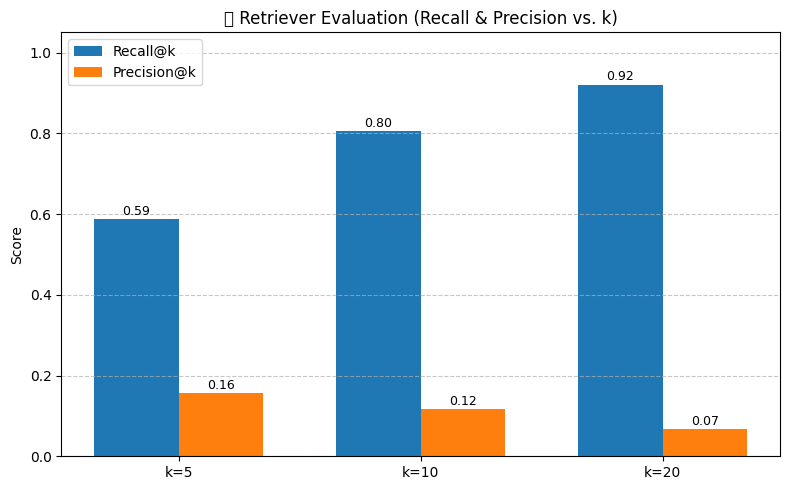

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Set bar positions
x = np.arange(len(metrics_df["k"]))  # [0, 1, 2]
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, metrics_df["Recall"], width, label="Recall@k")
bars2 = ax.bar(x + width/2, metrics_df["Precision"], width, label="Precision@k")

# Labels and formatting
ax.set_title("📊 Retriever Evaluation (Recall & Precision vs. k)")
ax.set_xticks(x)
ax.set_xticklabels(metrics_df["k"])
ax.set_ylabel("Score")
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9)

plt.tight_layout();